This is the testing file for the ridge regression algorithm, it can be ran by importing the necessary libraries.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import linear_r as lr
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

%load_ext autoreload
%autoreload 2

In [61]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)
lin = LinearRegression().fit(X_train, y_train)
lin.score(X_train, y_train)

0.9434644739413218

In [92]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
train_data = np.concatenate((X_train, y_train), axis=1)
test_data = np.concatenate((X_test, y_test), axis=1)
model = lr.train_mlr(train_data)
model["R-Squared Training"]

0.9434644739413219

In [12]:
print("Test score of sklearn: " + str(lin.score(X_test, y_test)))
print("Test score of my linear regression: " + str(lr.predict_mlr(test_data, model["Beta_hat"])["R-Squared Test"]))

Test score of sklearn: 0.7552361218471089
Test score of my linear regression: 0.7552361218484293


In [13]:
ridge_model = lr.train_ridge_regression(train_data)
ridge_model["R-Squared Training"]

0.8708317636707955

In [14]:
ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train)

0.8708317636707952

In [15]:
print("Test score of sklearn: " + str(ridge.score(X_test, y_test)))
print("Test score of my ridge regression: " + str(lr.test_ridge_regression(test_data, ridge_model['Beta Hat'])["R-Squared Test"]))

Test score of sklearn: 0.8068661033562764
Test score of my ridge regression: 0.8068661033562888


In [1]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()

In [18]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
train_data = np.concatenate((X_train, y_train), axis=1)
test_data = np.concatenate((X_test, y_test), axis=1)
linear_model = lr.train_mlr(train_data)
linear_model

{'Beta_hat': array([-3.70232774e+01,  4.48674910e-01,  9.72425757e-03, -1.23323343e-01,
         7.83144908e-01, -2.02962049e-06, -3.52631849e-03, -4.19792484e-01,
        -4.33708061e-01]),
 'R-Squared Training': 0.612551191396695,
 'Variance': 152.71951540359794}

In [20]:
lr.predict_mlr(test_data, linear_model["Beta_hat"])["R-Squared Test"]

0.5757877060542553

In [6]:
ridge_model = lr.train_ridge_regression(train_data, 0.8)
ridge_model

{'Beta Hat': array([-3.70201927e+01,  4.48543661e-01,  9.72562388e-03, -1.23075882e-01,
         7.81761778e-01, -2.02657537e-06, -3.52595050e-03, -4.19788052e-01,
        -4.33686269e-01]),
 'R-Squared Training': 0.6125511485601522,
 'Variance': 152.69255440748012}

In [22]:
lr.test_ridge_regression(test_data, ridge_model["Beta Hat"])["R-Squared Test"]

0.5758415523925382

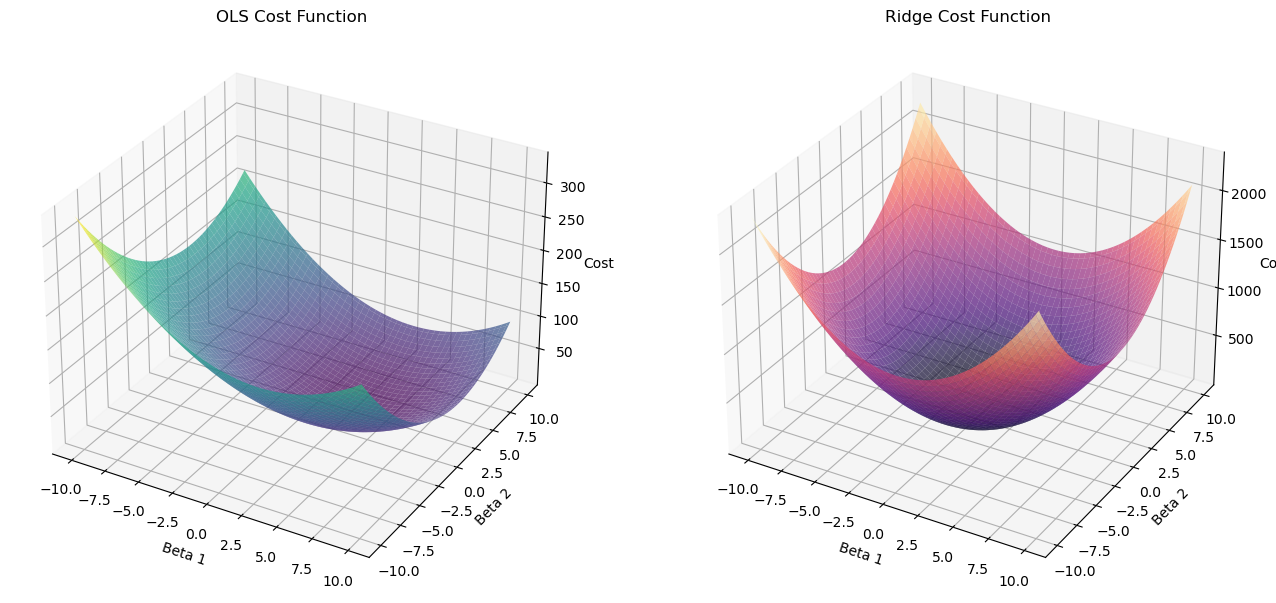

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# This is a simple conceptual example, not a real OLS or Ridge regression.

# Generate a grid of values

beta1 = np.linspace(-10, 10, 100)
beta2 = np.linspace(-10, 10, 100)
B1, B2 = np.meshgrid(beta1, beta2)

# Assume some "true" coefficients for demonstration
true_beta = np.array([3, 3])

# Calculate the OLS cost function value (Sum of Squared Residuals)
OLS_cost = (B1 - true_beta[0])**2 + (B2 - true_beta[1])**2

# Calculate the Ridge cost function value (OLS cost + L2 penalty)
lambda_ridge = 10  # Ridge penalty term
Ridge_cost = OLS_cost + lambda_ridge*(B1**2 + B2**2)

# Plotting
fig = plt.figure(figsize=(16, 8))

# OLS Cost Function Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(B1, B2, OLS_cost, cmap='viridis', alpha=0.7)
ax1.set_title('OLS Cost Function')
ax1.set_xlabel('Beta 1')
ax1.set_ylabel('Beta 2')
ax1.set_zlabel('Cost')

# Ridge Cost Function Plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(B1, B2, Ridge_cost, cmap='magma', alpha=0.7)
ax2.set_title('Ridge Cost Function')
ax2.set_xlabel('Beta 1')
ax2.set_ylabel('Beta 2')
ax2.set_zlabel('Cost')

plt.show()


In [41]:
model = lr.train_mlr(train_data)
lr.predict_mlr(test_data, model["Beta_hat"])["Variance"]

113.89195442456281

In [39]:
ridge = lr.train_ridge_regression(train_data)
lr.test_ridge_regression(test_data, ridge["Beta Hat"])["Variance"]

89.86782330995115

In [3]:
train_data, test_data = lr.load_boston(20)

We can compare the coeffiencents between our linear regression and ridge regression algorithms.

In [82]:
lr_model = lr.train_mlr(train_data)
lr_coefs = lr_model["Beta_hat"]
lr_var = lr_model["Variance"]
lr_r2 = lr_model["R-Squared Training"]

lr_test = lr.predict_mlr(test_data, lr_coefs)
lr_test_r2 = lr_test["R-Squared Test"]

r_model = lr.train_ridge_regression(train_data, alpha=1)
r_coefs = r_model["Beta Hat"]
r1_var = r_model["Variance"]
r1_r2 = r_model["R-Squared Training"]

r1_test = lr.test_ridge_regression(test_data, r_coefs)
r1_test_r2 = r1_test["R-Squared Test"]

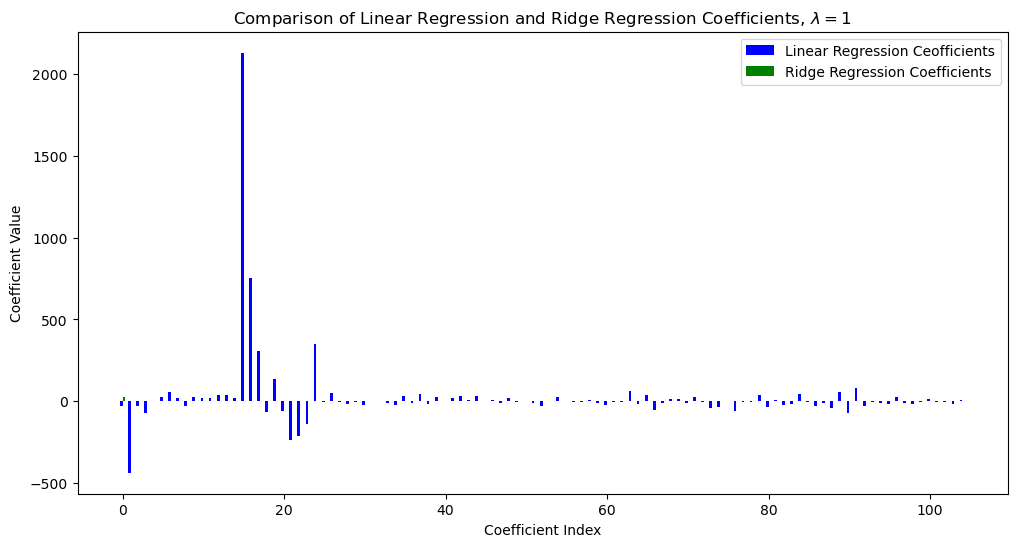

In [23]:
indices = np.arange(len(lr_coefs))

plt.figure(figsize=(12, 6))
width = 0.35

plt.bar(indices - width/2, lr_coefs, width=width, label="Linear Regression Ceofficients", color = 'blue')
plt.bar(indices + width/2, r_coefs, width=width, label='Ridge Regression Coefficients', color = "green")

plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Linear Regression and Ridge Regression Coefficients, $\lambda = 1$")
plt.legend()

plt.show()


In [80]:
r_model = lr.train_ridge_regression(train_data, alpha=0.0001)
r_coefs = r_model["Beta Hat"]
r0001_var = r_model["Variance"]
r0001_r2 = r_model["R-Squared Training"]

r0001_test = lr.test_ridge_regression(test_data, r_coefs)
r0001_test_r2 = r0001_test["R-Squared Test"]

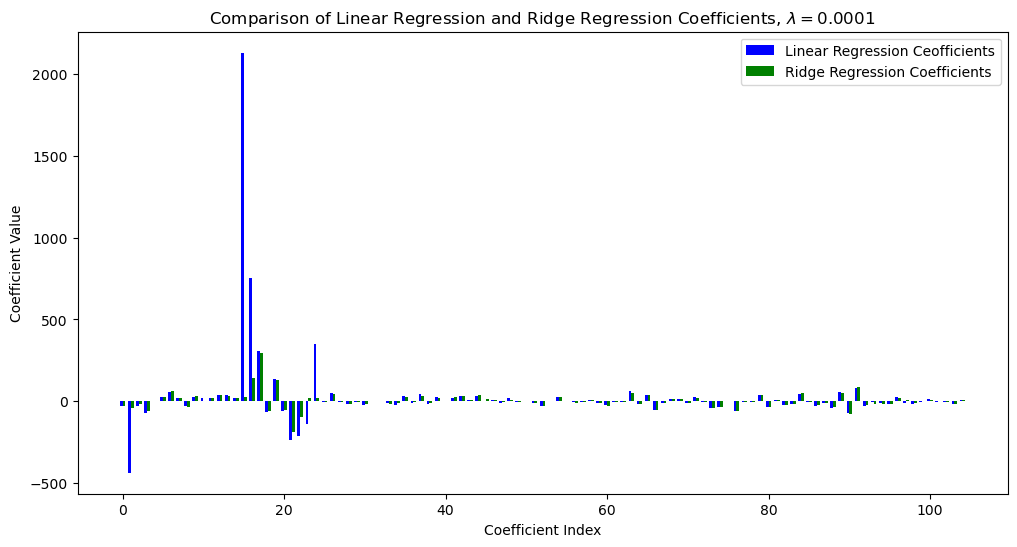

In [72]:
lr.plt_ridge_lr_comparison(lr_coefs, r_coefs, alpha=0.0001)

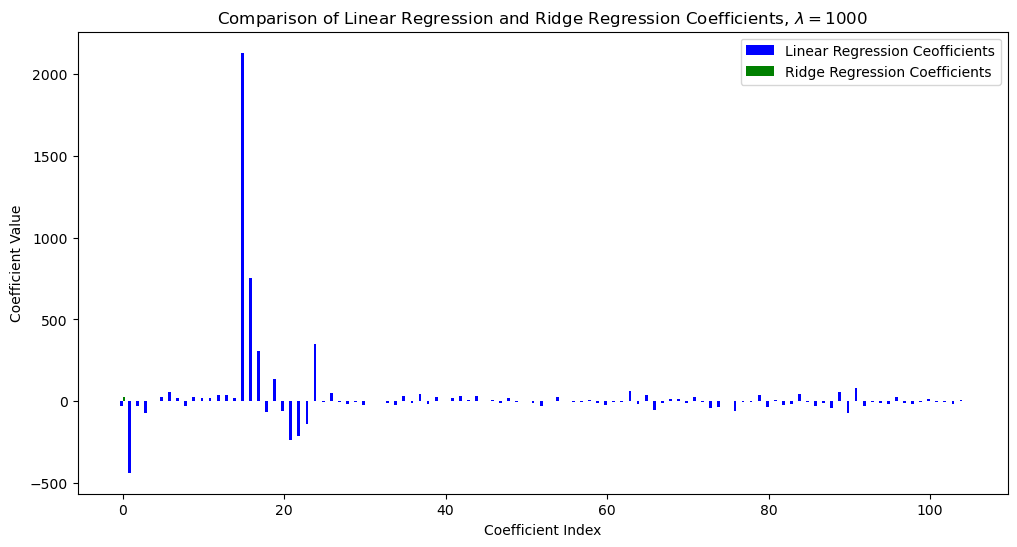

In [81]:
r_model = lr.train_ridge_regression(train_data, alpha=1000)
r_coefs = r_model["Beta Hat"]
r1000_var = r_model["Variance"]
r1000_r2 = r_model["R-Squared Training"]

r1000_test = lr.test_ridge_regression(test_data, r_coefs)
r1000_test_r2 = r1000_test["R-Squared Test"]

lr.plt_ridge_lr_comparison(lr_coefs, r_coefs, alpha=1000)

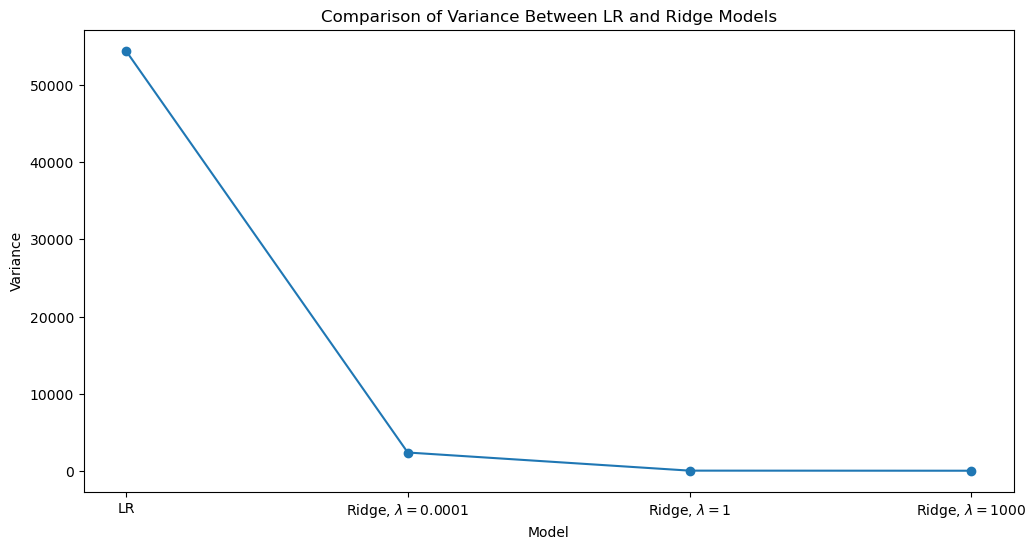

In [74]:
lambda_vals = [0.0001, 1, 1000]
ridge_vars =[r0001_var, r1_var, r1000_var]
plt.figure(figsize=(12, 6))
plt.plot(["LR"]+ [f'Ridge, $\lambda = {l}$' for l in lambda_vals], [lr_var] + ridge_vars, marker = "o")
plt.xlabel("Model")
plt.ylabel("Variance")
plt.title('Comparison of Variance Between LR and Ridge Models')
plt.show()


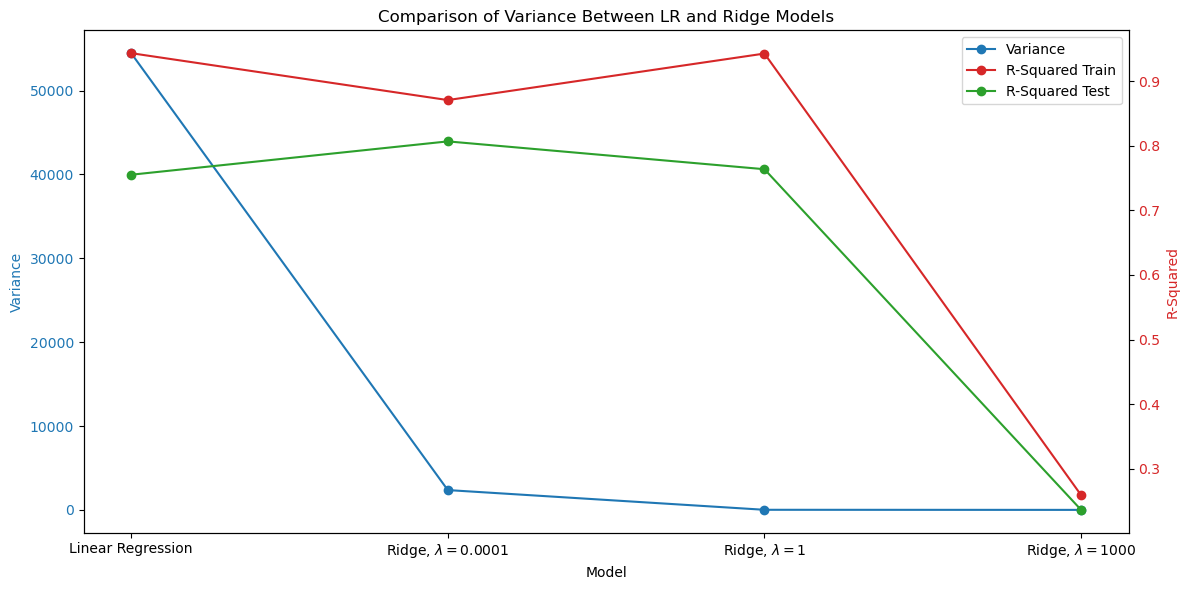

In [90]:
training_r2s = [lr_r2, r1_r2, r0001_r2, r1000_r2]
test_r2s = [lr_test_r2, r1_test_r2, r0001_test_r2, r1000_test_r2]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel("Model")
ax1.set_ylabel("Variance", color = 'tab:blue')
ax1.plot(["Linear Regression"]+[f'Ridge, $\lambda = {l}$' for l in lambda_vals], [lr_var]+ridge_vars, marker='o', color='tab:blue', label = "Variance")
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel("R-Squared", color='tab:red')
ax2.plot(["Linear Regression"]+[f'Ridge, $\lambda = {l}$' for l in lambda_vals], training_r2s, marker='o', color='tab:red', label='R-Squared Train')
ax2.plot(["Linear Regression"]+[f'Ridge, $\lambda = {l}$' for l in lambda_vals], test_r2s, marker='o', color='tab:green', label="R-Squared Test")
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Comparison of Variance Between LR and Ridge Models')
fig.tight_layout()
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")
plt.show()


In [10]:
from ridge_regression import RidgeRegression
import model_evaluation as m_e

rr_model = RidgeRegression()
y_hat = rr_model.train(train_data)["Predictions"]
y = train_data[:, -1]

m_e.mse(y, y_hat)


5.115617819336794e-18

In [46]:
import model_selection as m_s
from sklearn.model_selection import cross_val_score
from data_utils import StandardScaler
from ridge_regression import RidgeRegression

X, y = mglearn.datasets.load_extended_boston()

scaler = StandardScaler()



In [47]:
sklearn_model = Ridge()
scores_sklearn = cross_val_score(sklearn_model, X, y, cv=2, scoring='r2')
avg_score_sklearn = np.mean(scores_sklearn)

avg_score_sklearn

0.6741106948253411

In [48]:
y_reshaped = y.reshape(-1, 1)
data = np.concatenate((X, y_reshaped), axis=1)
scaler.fit_transform(data)

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -0.92289294,
        -0.75222857,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.2792108 ,
        -0.54327701, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ..., -1.07353999,
        -0.77707201,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ..., -0.82077029,
        -0.72996207,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ..., -0.69718983,
        -0.6956859 , -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ..., -0.47417222,
        -0.62378247, -1.15724782]])

In [49]:
model = RidgeRegression()
m_s.k_fold_cross_validation(model, data, 2, score="R-Squared")

0.6741106948253577

In [50]:
import model_selection as m_s

In [51]:
lambda_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

final_model = m_s.lambda_ridge(data, 5, lambda_values)
final_model

126.92202080048551
74.09668853582775
53.71096889147755
32.98063920904538
21.423064166503238
29.40038302108283
45.55559343146818
Best lambda: 1, with score: 21.423064166503238


In [25]:
import data_utils

train_data, test_data = data_utils.load_boston(0)

In [27]:
final_model.train(train_data)

{'Beta Hat': array([ 2.13905260e+01, -1.41368408e+00, -1.55661895e+00, -1.46543409e+00,
        -1.26616071e-01, -7.91193605e-02,  8.33161023e+00,  2.54975060e-01,
        -4.94145701e+00,  3.89862268e+00, -1.05866058e+00, -1.58433734e+00,
         1.05103856e+00, -4.01220799e+00,  3.33720475e-01,  3.64725471e-03,
        -8.49295793e-01,  7.44989267e-01, -1.43106836e+00, -1.62981017e+00,
        -1.40486294e+00, -4.47314366e-02, -1.74619880e+00, -1.46715888e+00,
        -1.33237111e+00, -1.69154625e+00, -5.06179637e-01,  2.62197591e+00,
        -2.09210002e+00,  1.95074661e-01, -2.75469422e-01,  5.11308202e+00,
        -1.67083739e+00, -9.81863179e-02,  6.34477127e-01, -6.10008281e-01,
         4.01805898e-02, -1.27661999e+00, -2.91349679e+00,  3.39544035e+00,
         7.91904036e-01,  1.35260232e+00, -4.03661265e+00,  2.32361734e+00,
        -3.36712926e+00,  1.81279204e+00,  3.01566897e+00, -1.89452070e+00,
        -2.50844073e-01, -2.89543735e+00, -1.26616071e-01, -5.00217192e+00,


In [28]:
final_model.test(test_data)

{'Predictions': array([24.96023269, 24.68410887, 27.69034825, 13.09647783, 20.42271463,
        19.54452905, 21.85185003, 21.67758776, 18.61930946, 18.7698162 ,
         5.9910075 , 13.42951791, 14.66614326,  9.02691443, 42.88221287,
        32.89450939, 23.42605877, 37.96847269, 30.29274568, 22.71582566,
        24.77686476, 23.24369021, 19.49808856, 28.04403682, 21.88748427,
        22.16537667, 17.3015203 , 17.67597787, 39.54895931, 18.89422661,
        17.20846873, 17.32720023, 18.92102512, 21.4189529 , 27.56139907,
        21.42300993,  8.79836059, 30.04808353, 16.22439954, 13.83421703,
        24.84427251, 21.12209877, 22.23274182, 17.24619793, 23.65077455,
        24.77788692, 18.99260533, 18.7943427 , 12.60993012, 23.64953703,
        14.9134075 , 17.87448733, 22.85120994, 36.71731924, 13.94303365,
        20.52162984, 19.0460956 , 16.88323697, 16.9731729 , 21.2860116 ,
        18.20055782, 21.00357373, 31.99360089, 30.34341872, 18.95764069,
        29.95011463, 15.76894096, 18

In [35]:
from sklearn.datasets import fetch_california_housing

cal = fetch_california_housing()
X, y = cal.data, cal.target

y_reshaped = y.reshape(-1, 1)
data = np.concatenate((X, y_reshaped), axis=1)

lambda_values = [0.001, 0.01, 0.1, 1, 10, 100]

final_model = m_s.lambda_ridge(data, 5, lambda_values)
final_model


0.5582901598026511
0.5582900558258108
0.5582890165436566
0.5582787255495466
0.5581857054839583
0.5579724432214966
Best lambda: 100, with score: 0.5579724432214966


In [32]:
train_data, test_data = data_utils.load_california(0)

final_model.train(train_data)

{'Beta Hat': array([-3.61121074e+01,  4.28788454e-01,  9.81023923e-03, -8.35197429e-02,
         5.12996431e-01, -6.71087910e-06, -4.56619106e-03, -4.14062418e-01,
        -4.25798741e-01]),
 'Predictions': array([3.40835799, 2.90006461, 1.62504291, ..., 2.48756582, 3.07915706,
        0.46822998]),
 'R-Squared Training': 0.610659909402474,
 'Variance': 145.0228217509834}

In [34]:
final_model.test(test_data)

100

In [105]:
X, y = mglearn.datasets.load_extended_boston()
y_reshaped = y.reshape(-1, 1)
data = np.concatenate((X, y_reshaped), axis=1)

In [106]:
lambda_values = [0.001, 0.01, 0.1, 1, 10]

final_model = m_s.lambda_ridge(data, 5, lambda_values)
final_model

1.7038962227207821
1.2966505782246256
0.719496812012608
0.6901385423679948
0.4988223722041951
Best lambda: 10, with score: 0.4988223722041951


In [107]:
train_data, test_data = data_utils.load_boston(17)

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [110]:
final_model.train(train_data)['R-Squared Training']

0.9040374978028867

In [111]:
final_model.test(test_data)['R-Squared Test']

0.8584375162171598

In [112]:
model = RidgeRegression(0.001)

model.train(train_data)['R-Squared Training']

0.9423728546098957

In [113]:
model.test(test_data)['R-Squared Test']

0.8399856019440868

In [114]:
model = RidgeRegression(0.01)
model.train(train_data)['R-Squared Training']

0.9419795732207792

In [115]:
model.test(test_data)['R-Squared Test']

0.84585268833074

In [116]:
model = RidgeRegression(0.1)
model.train(train_data)['R-Squared Training']

0.938819490534361

In [117]:
model.test(test_data)['R-Squared Test']

0.8501518249855783

In [118]:
model = RidgeRegression(1)
model.train(train_data)['R-Squared Training']

0.9286037373185237

In [119]:
model.test(test_data)['R-Squared Test']

0.8517635123399289

In [121]:
from linear_regression import LinearRegression
model = LinearRegression()

model.train(train_data)['R-Squared Training']

0.9423892279654961

In [123]:
model.predict(test_data)['R-Squared Test']

0.8386113451077793